# Business Case: Walmart - Confidence Interval and CLT


Walmart is an American multinational retail corporation that operates a chain of supercenters, discount
departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers
worldwide.
Problem Statement:The Management team at Walmart Inc. wants to analyze the customer purchase behavior
(specifically, purchase amount) against the customer’s gender and the various other factors to help the business
make better decisions. They want to understand if the spending habits differ between male and female
customers.

#### Importing Libraries, Loading the dataset and Basic Analysis

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [147]:
df=pd.read_csv('walmart.csv')

In [148]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [149]:
df.shape

(550068, 10)

We have a dataset of 550068 rows and 10 columns 

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


As observed from the above data, the dataset does not have any missing values.

In [151]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User_ID,550068.0,NaN,NaN,NaN,1003028.842401,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Product_ID,550068,3631,P00265242,1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,550068,2,M,414259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,550068,7,26-35,219587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,550068.0,NaN,NaN,NaN,8.076707,6.52266,0.0,2.0,7.0,14.0,20.0
City_Category,550068,3,B,231173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stay_In_Current_City_Years,550068,5,1,193821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,550068.0,NaN,NaN,NaN,0.409653,0.49177,0.0,0.0,0.0,1.0,1.0
Product_Category,550068.0,NaN,NaN,NaN,5.40427,3.936211,1.0,1.0,5.0,8.0,20.0
Purchase,550068.0,NaN,NaN,NaN,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [152]:
df['Product_ID'].nunique()

3631

There are 3631 unique products sold from Walmart

In [153]:
df['User_ID'].nunique()

5891

A new dataframe for user based statistics has been created below:

In [154]:
df_users=df.groupby(['User_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status']).agg(No_of_Txns=('User_ID','count'),Tot_Purchase_Amt=('Purchase','sum')).reset_index()

In [155]:
df_users.head(2)

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,No_of_Txns,Tot_Purchase_Amt
0,1000001,F,0-17,10,A,2,0,35,334093
1,1000002,M,55+,16,C,4+,0,77,810472


In [156]:
df_users[['Gender']].value_counts()

Gender
M         4225
F         1666
dtype: int64

In [157]:
df_users[['Marital_Status']].value_counts()

Marital_Status
0                 3417
1                 2474
dtype: int64

In [158]:
df_users[['Age']].value_counts()

Age  
26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
dtype: int64

In the data, we have 5891 unique customers, out of which 4225 are males and 1666 females

In [159]:
df_users.groupby(['City_Category']).agg(No_of_Customers=('User_ID','count'),No_of_Txns=('No_of_Txns','sum'),Tot_Purchase_Amt=('Tot_Purchase_Amt','sum'))

,No_of_Customers,No_of_Txns,Tot_Purchase_Amt
City_Category,,,
A,1045,147720,1316471661
B,1707,231173,2115533605
C,3139,171175,1663807476


Highest number of Customers are from City C but the number of transactions and total purchase value of transactions is more for City B.

In [160]:
df_users.groupby(['Marital_Status']).agg(No_of_Customers=('User_ID','count'),No_of_Txns=('No_of_Txns','sum'),Tot_Purchase_Amt=('Tot_Purchase_Amt','sum'))

,No_of_Customers,No_of_Txns,Tot_Purchase_Amt
Marital_Status,,,
0,3417,324731,3008927447
1,2474,225337,2086885295


Unmarried customers have purchased more as compared to Married Customers

In [161]:
df_users.groupby(['Age']).agg(No_of_Customers=('User_ID','count'),No_of_Txns=('No_of_Txns','sum'),Tot_Purchase_Amt=('Tot_Purchase_Amt','sum'))

,No_of_Customers,No_of_Txns,Tot_Purchase_Amt
Age,,,
0-17,218,15102,134913183
18-25,1069,99660,913848675
26-35,2053,219587,2031770578
36-45,1167,110013,1026569884
46-50,531,45701,420843403
51-55,481,38501,367099644
55+,372,21504,200767375


Age group 26-35 has done highest number of transactions.

#### Univariate Analysis

###### i. Categorical Variables

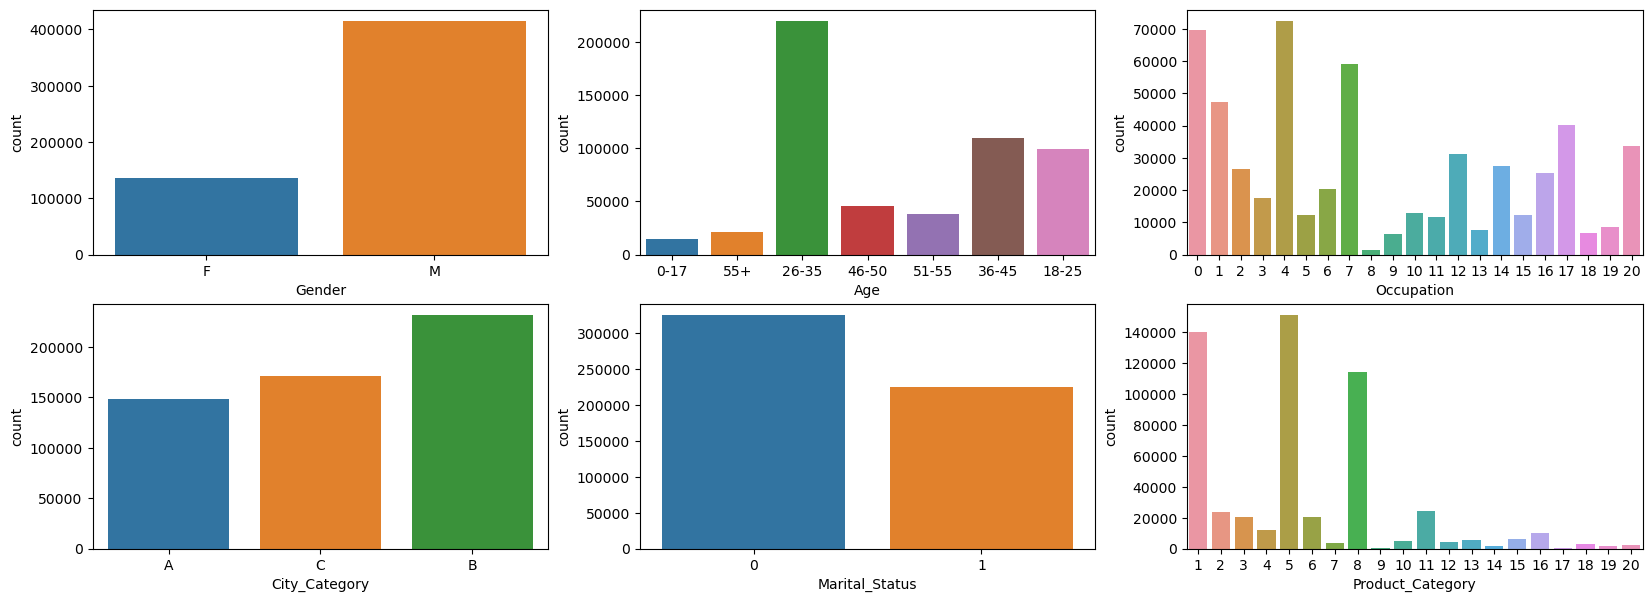

In [162]:
fig,axis= plt.subplots(2,3,figsize=(20,7)) 
sns.countplot(data=df,x="Gender",ax=axis[0][0]) 
sns.countplot(data=df,x="Age",ax= axis[0][1]) 
sns.countplot(data=df,x="Occupation",ax=axis[0][2]) 
sns.countplot(data=df,x="City_Category",ax=axis[1][0]) 
sns.countplot(data=df,x="Marital_Status",ax= axis[1][1]) 
sns.countplot(data=df,x="Product_Category",ax=axis[1][2]) 
plt.show() 

Observations:
* Most of the users are Male.
* There are 20 different types of Occupation and Product_Categories.
* More no of transactions are happening from City C.
* More single users are shopping as compare to Married
* Occupation with 0,4,7 and 17 have highest purchasing frequency.
* Product_Category - 1, 5, 8, & 11 have highest purchasing frequency.

###### ii. Continous Variables

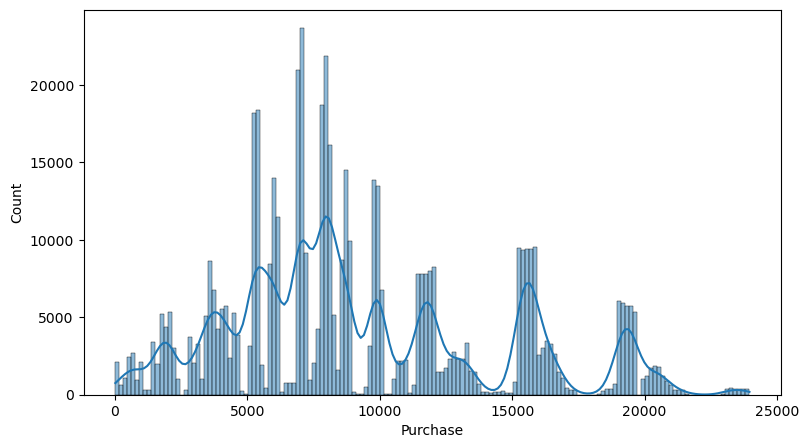

In [163]:
plt.figure(figsize=(9, 5))
sns.histplot(data=df, x='Purchase', kde=True)
plt.show() 

#### Outlier Detection

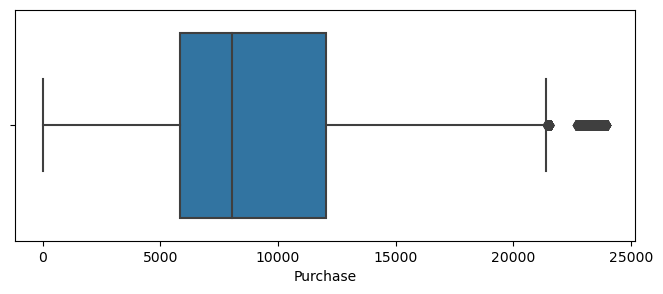

In [164]:
plt.figure(figsize=(8, 3))
sns.boxplot(data=df, x='Purchase')
plt.show() 

As we can see from above, purchase field have few number of outliers. 
One of the solution for outliers can be that we can replace all transactions with amount greater than [Q3+1.5(Q3-Q1)] with the amount [Q3+1.5(Q3-Q1)]. \
In this particular case, we are not going with the above solution as outliers symbolise the random sampling of the very large population- billions of transactions of Walmart customers .
Removing outliers from this data might hinder with the true representation of the population with the help of sample. It may  add some biasness in concluding the confidence interval for the true mean of the population.

#### Bivariate Analysis

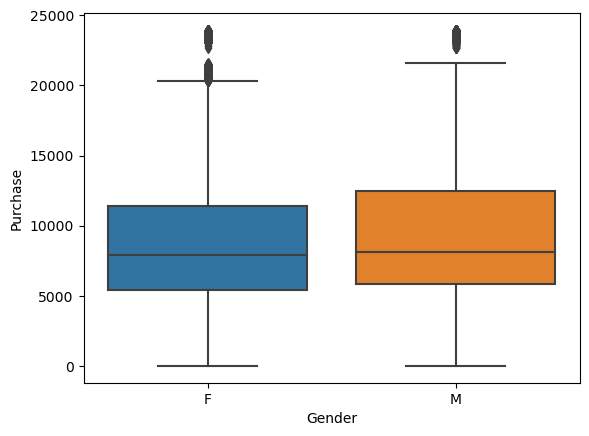

In [165]:
sns.boxplot(data=df,x="Gender",y='Purchase') 
plt.show() 

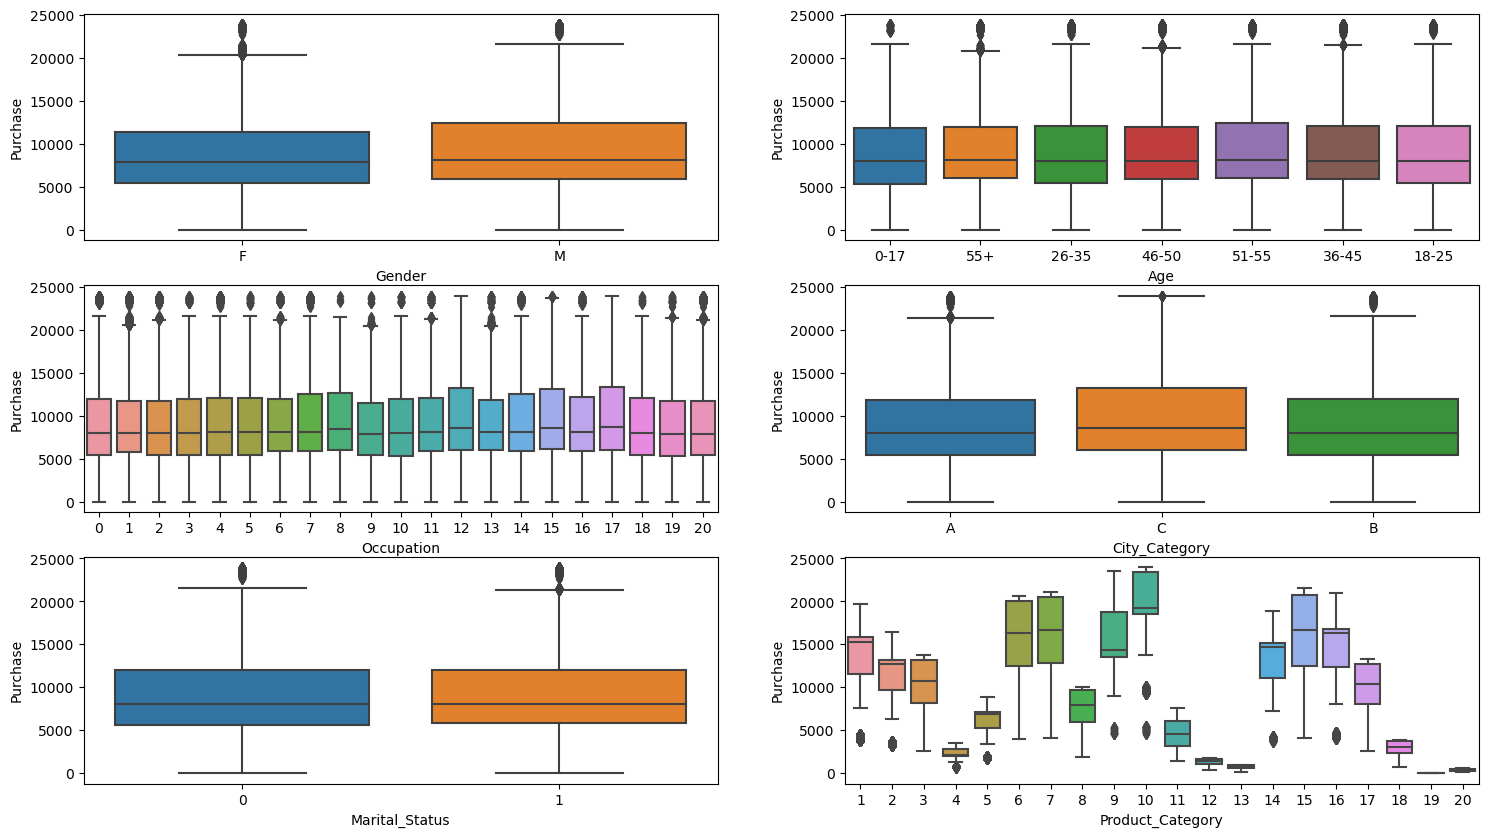

In [166]:
fig,axis= plt.subplots(3,2,figsize=(18,10)) 
sns.boxplot(data=df,x='Gender',y="Purchase",ax=axis[0,0]) 
sns.boxplot(data=df,x="Age",y="Purchase",ax=axis[0,1]) 
sns.boxplot(data=df,x="Occupation",y="Purchase",ax=axis[1,0]) 
sns.boxplot(data=df,x="City_Category",y="Purchase",ax=axis[1,1]) 
sns.boxplot(data=df,x="Marital_Status",y="Purchase",ax=axis[2,0]) 
sns.boxplot(data=df,x="Product_Category",y="Purchase",ax=axis[2,1]) 
plt.show() 

Correlation Plots

i. Transaction_Data 

<AxesSubplot:>

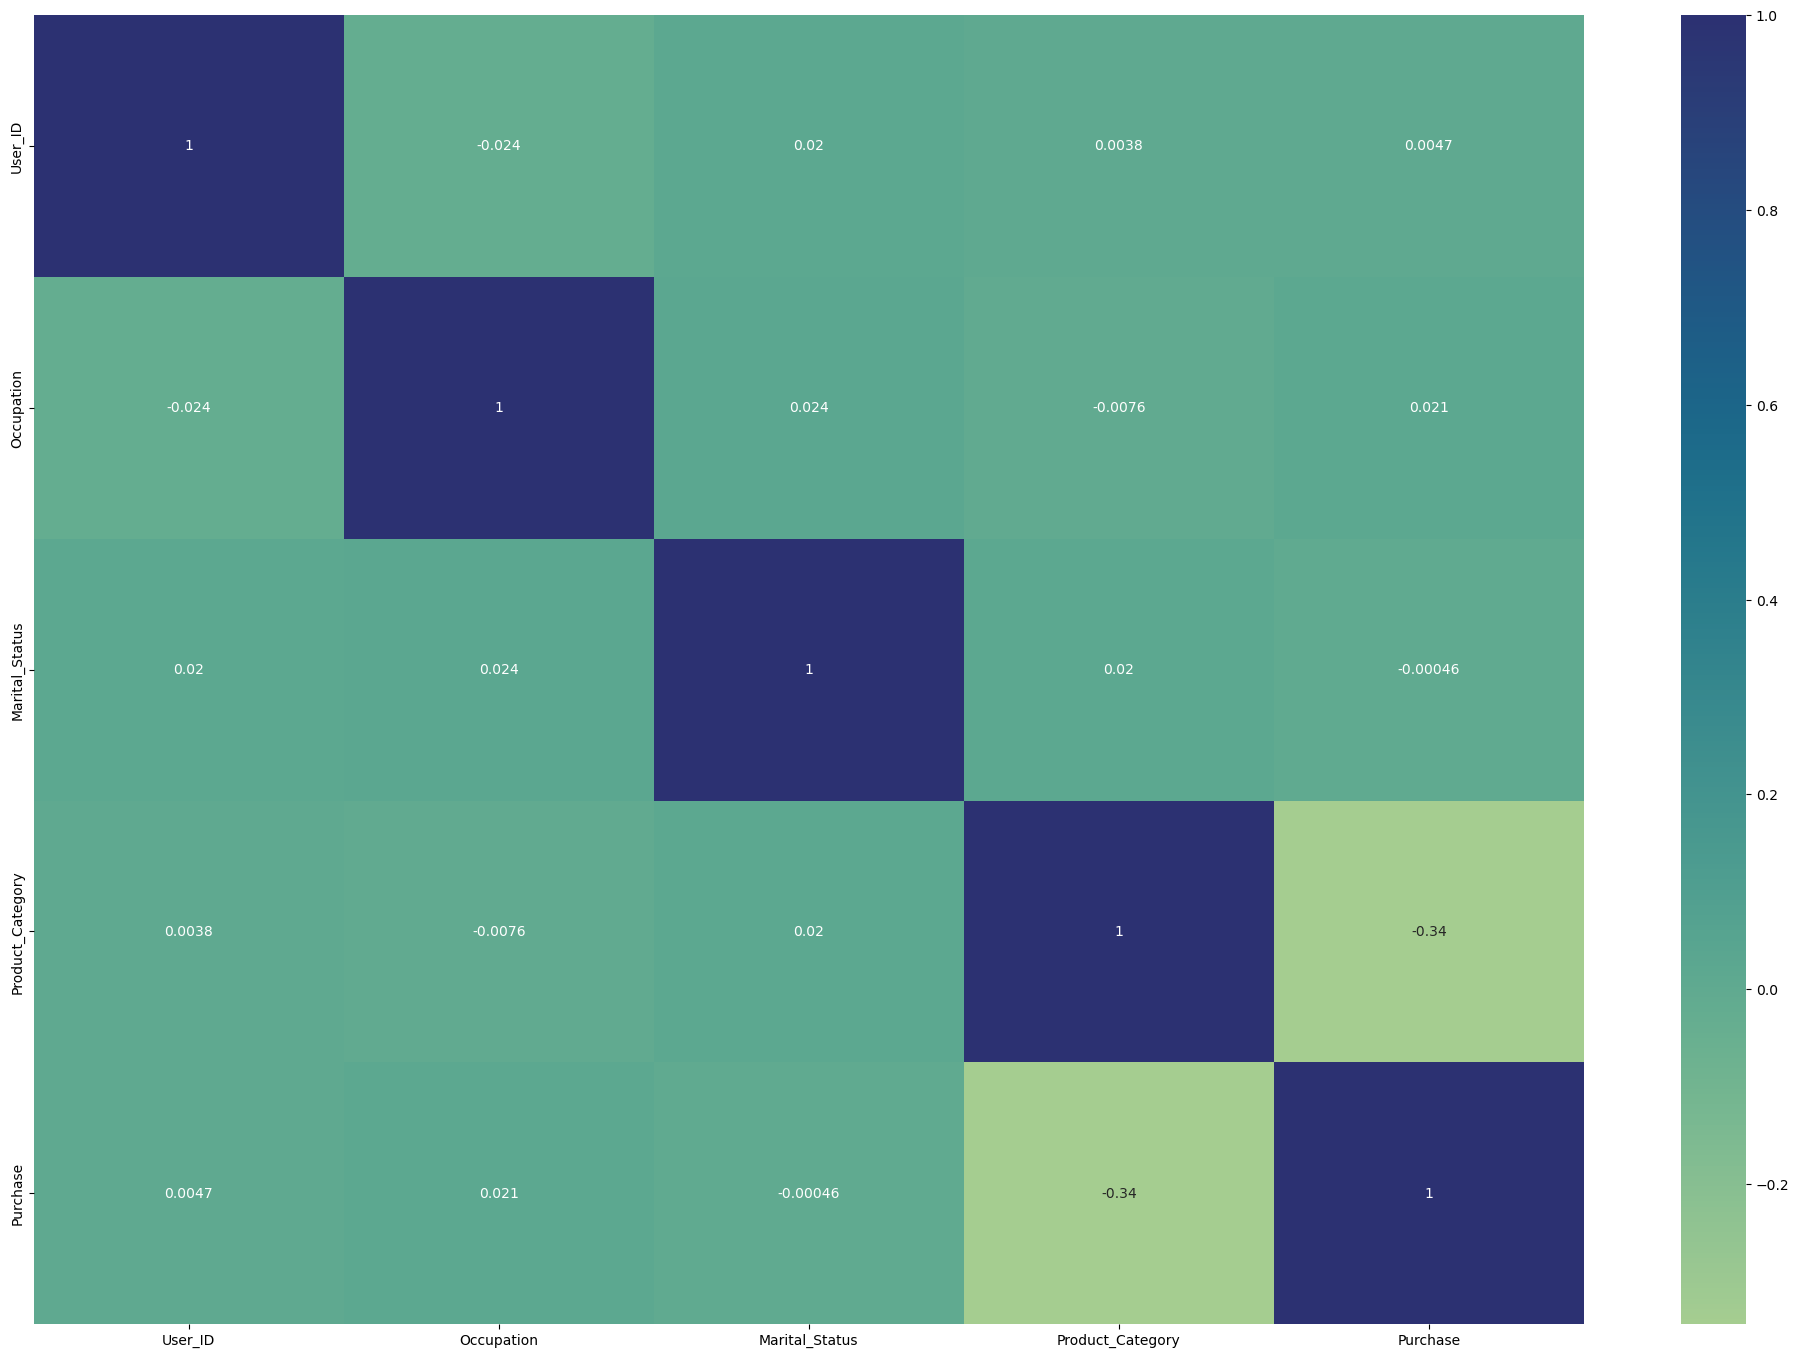

In [167]:
plt.figure(figsize=(25,17))
sns.heatmap(df.corr(), cmap="crest",annot=True)

ii. Users Data

<AxesSubplot:>

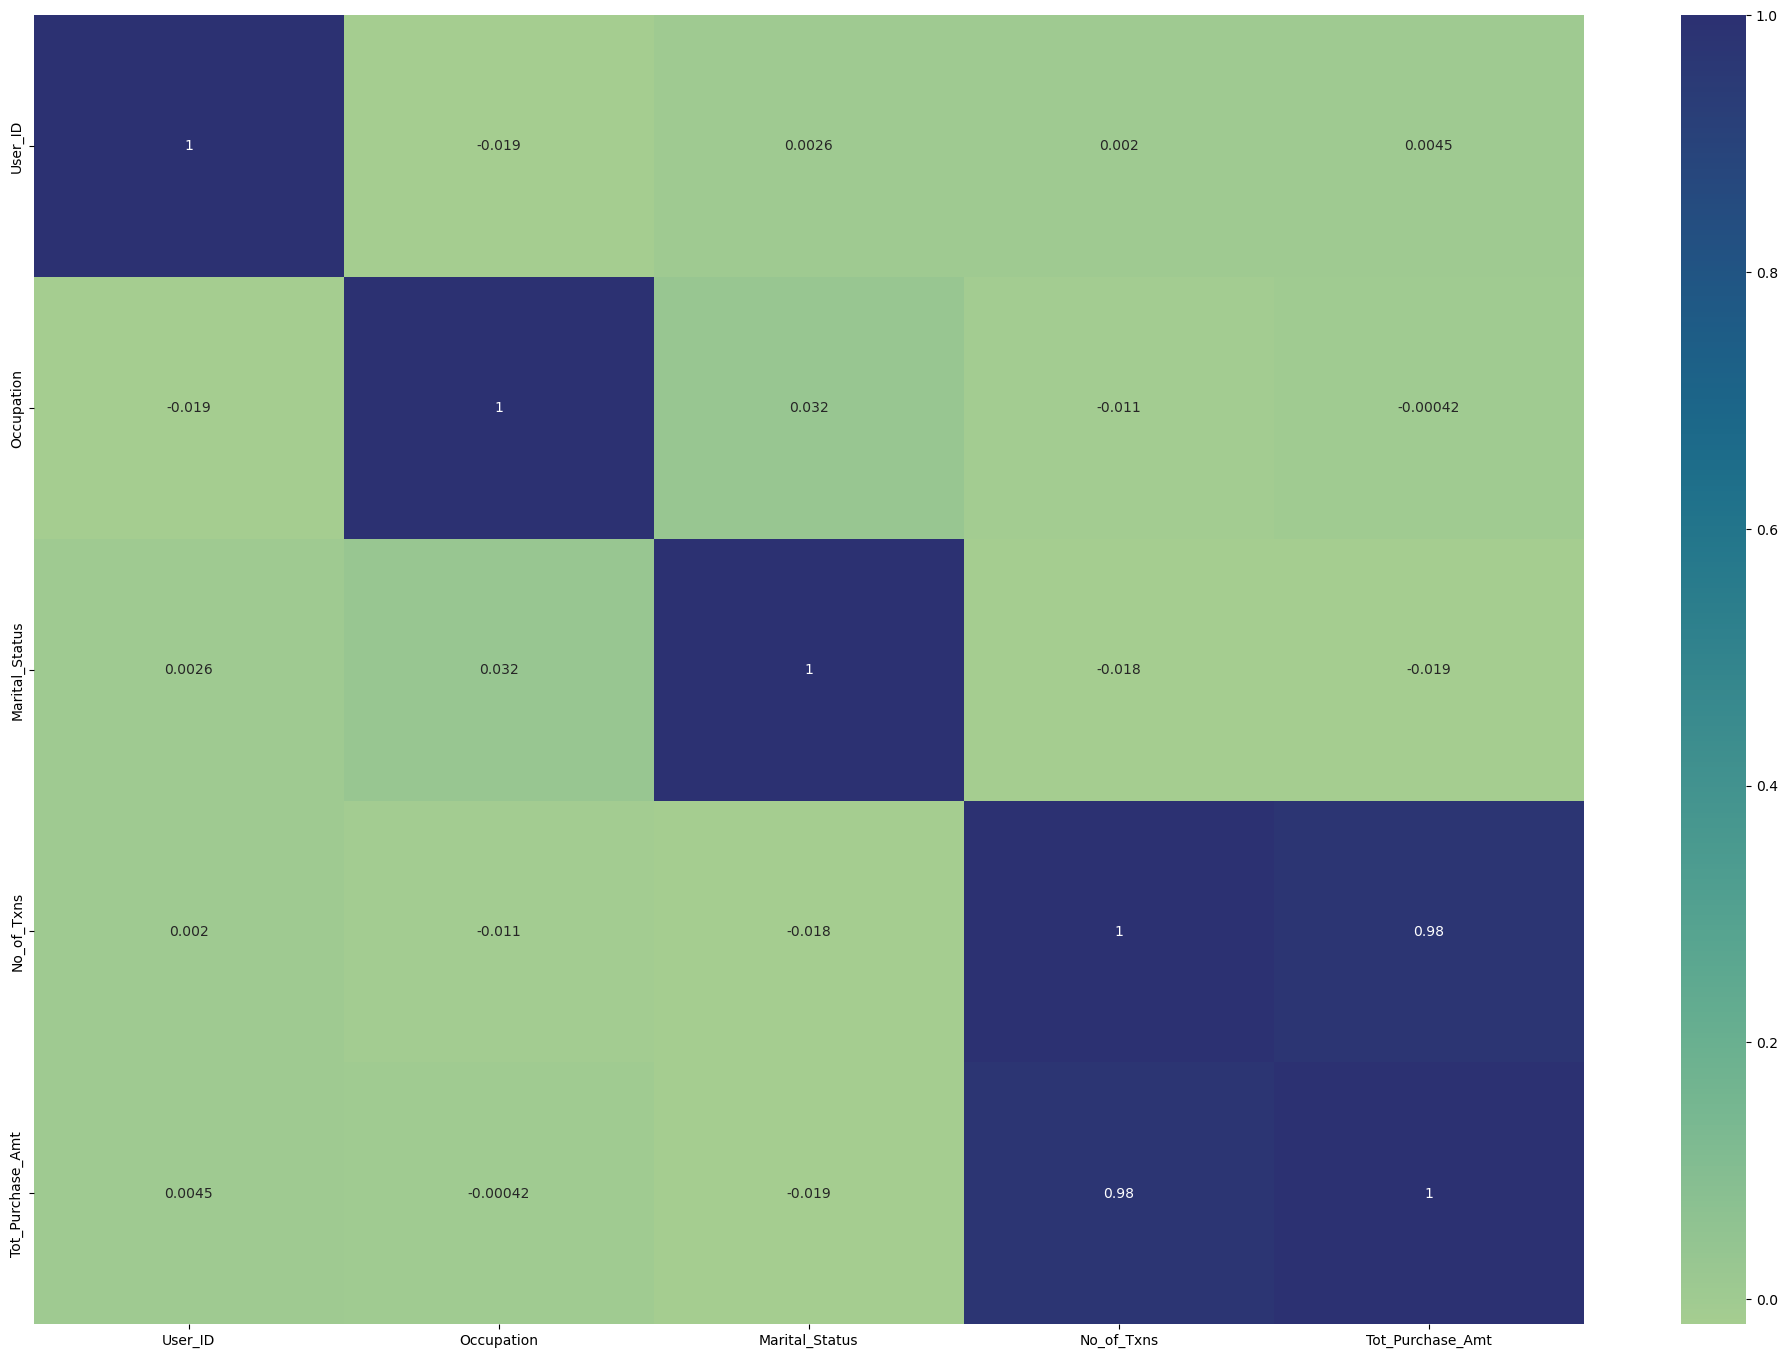

In [168]:
plt.figure(figsize=(25, 17))
sns.heatmap(df_users.corr(), cmap="crest",annot=True)

#### BOOTSTRAP SAMPLING- Based on Gender

In [169]:
male_df=df_users[df_users['Gender']=='M']
female_df=df_users[df_users['Gender']=='F']

In [170]:
male_df.Tot_Purchase_Amt.sample(3000).mean()

942861.4066666666

In [171]:
male_mean = []
for i in range(1000):
  avg = male_df.Tot_Purchase_Amt.sample(3000).mean()
  male_mean.append(avg)

In [172]:
female_mean = []
for i in range(1000):
  avg = female_df.Tot_Purchase_Amt.sample(1500).mean()
  female_mean.append(avg)

<AxesSubplot:ylabel='Density'>

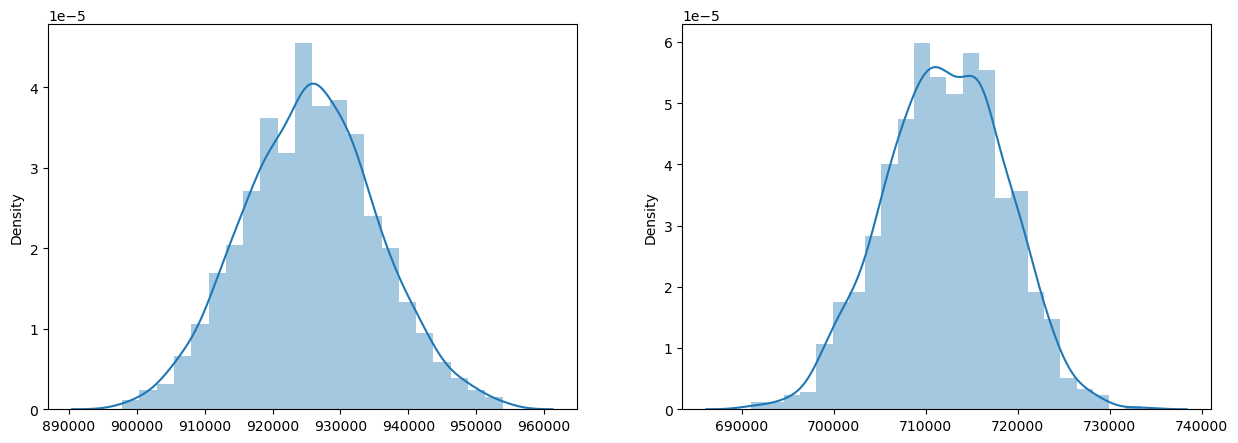

In [173]:
fig , axis = plt.subplots(1 , 2 , figsize = (15,5))
sns.distplot(male_mean, ax =axis[0])
sns.distplot(female_mean, ax =axis[1])

<AxesSubplot:ylabel='Density'>

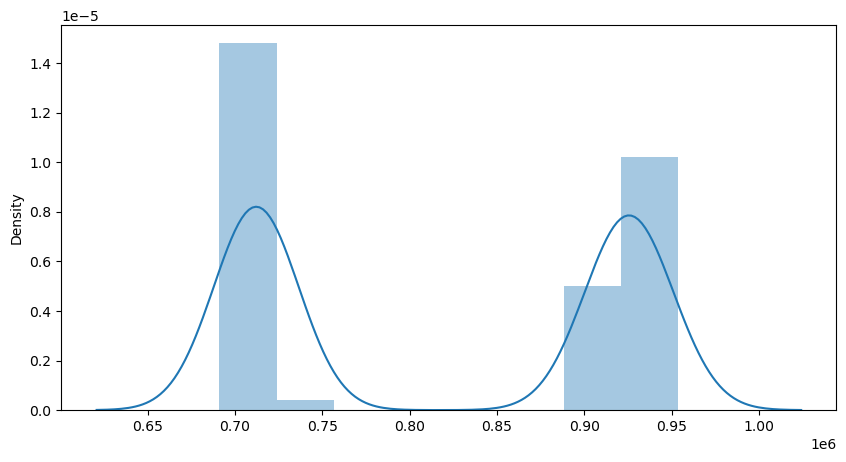

In [174]:
plt.figure(figsize=(10, 5))
sns.distplot([male_mean,female_mean])

Above graph shows that Intervals for Male and Female population are not overlapping

#### Confidence Intervals

In [175]:
male_mean=pd.Series(male_mean)
female_mean=pd.Series(female_mean)

In [176]:
print("Mean of the male population:",male_mean.mean())
print("Mean of the female population:",female_mean.mean())

Mean of the male population: 925641.4312159996
Mean of the female population: 712092.3860233327


Calculation for 95% Confidence Interval:

In [177]:
print("Lower limit of the male population:",male_mean.mean()-1.96*male_mean.std()/np.sqrt(len(male_df)))
print("Upper limit of the male population:",male_mean.mean()+1.96*male_mean.std()/np.sqrt(len(male_df)))

Lower limit of the male population: 925346.5064015113
Upper limit of the male population: 925936.356030488


In [178]:
print("Lower limit of the female population:",female_mean.mean()-1.96*female_mean.std()/np.sqrt(len(female_df)))
print("Upper limit of the female population:",female_mean.mean()+1.96*female_mean.std()/np.sqrt(len(female_df)))

Lower limit of the female population: 711779.9620556306
Upper limit of the female population: 712404.8099910348


Calculation for 99% Confidence Interval:

In [179]:
print("Lower limit of the male population:",male_mean.mean()-2.576*male_mean.std()/np.sqrt(len(male_df)))
print("Upper limit of the male population:",male_mean.mean()+2.576*male_mean.std()/np.sqrt(len(male_df)))

Lower limit of the male population: 925253.8157455291
Upper limit of the male population: 926029.0466864702


In [180]:
print("Lower limit of the female population:",female_mean.mean()-2.576*female_mean.std()/np.sqrt(len(female_df)))
print("Upper limit of the female population:",female_mean.mean()+2.576*female_mean.std()/np.sqrt(len(female_df)))

Lower limit of the female population: 711681.7716657814
Upper limit of the female population: 712503.000380884


Calculation for 90% Confidence Interval:

In [181]:
print("Lower limit of the male population:",male_mean.mean()-1.645*male_mean.std()/np.sqrt(len(male_df)))
print("Upper limit of the male population:",male_mean.mean()+1.645*male_mean.std()/np.sqrt(len(male_df)))

Lower limit of the male population: 925393.9050324112
Upper limit of the male population: 925888.9573995881


In [182]:
print("Lower limit of the female population:",female_mean.mean()-1.645*female_mean.std()/np.sqrt(len(female_df)))
print("Upper limit of the female population:",female_mean.mean()+1.645*female_mean.std()/np.sqrt(len(female_df)))

Lower limit of the female population: 711830.1730504399
Upper limit of the female population: 712354.5989962255


#### BOOTSTRAP SAMPLING- Based on Marital Status

In [183]:
df_users[['Marital_Status']].value_counts()

Marital_Status
0                 3417
1                 2474
dtype: int64

In [184]:
unmarried_df=df_users[df_users['Marital_Status']==0]
married_df=df_users[df_users['Marital_Status']==1]

In [185]:
unmarried_mean = []
for i in range(1000):
  avg = unmarried_df.Tot_Purchase_Amt.sample(3000).mean()
  unmarried_mean.append(avg)

In [186]:
married_mean = []
for i in range(1000):
  avg = married_df.Tot_Purchase_Amt.sample(2000).mean()
  married_mean.append(avg)

<AxesSubplot:ylabel='Density'>

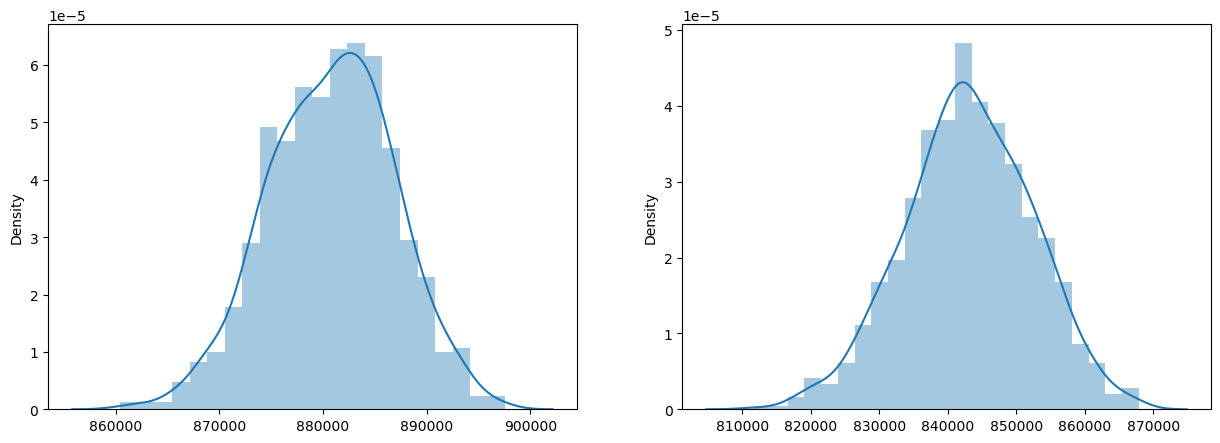

In [187]:
fig , axis = plt.subplots(1 , 2 , figsize = (15,5))
sns.distplot(unmarried_mean, ax =axis[0])
sns.distplot(married_mean, ax =axis[1])

<AxesSubplot:ylabel='Density'>

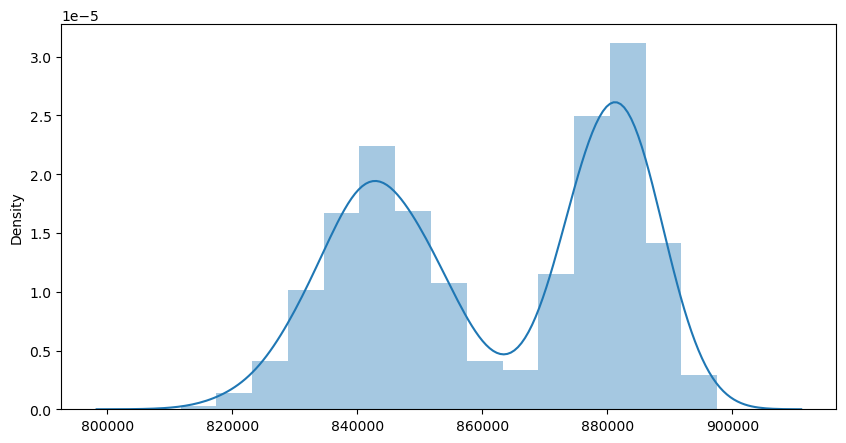

In [188]:
plt.figure(figsize=(10, 5))
sns.distplot([unmarried_mean,married_mean])

In [189]:
unmarried_mean=pd.Series(unmarried_mean)
married_mean=pd.Series(married_mean)

In [190]:
print("Mean of the Unmarried population:",unmarried_mean.mean())
print("Mean of the Married population:",married_mean.mean())

Mean of the Unmarried population: 880834.2608783323
Mean of the Married population: 843039.1522135


Calculation for 95% Confidence Interval:

In [191]:
print("Lower limit of the Unmarried  population:",unmarried_mean.mean()-1.96*unmarried_mean.std()/np.sqrt(len(unmarried_df)))
print("Upper limit of the Unmarried  population:",unmarried_mean.mean()+1.96*unmarried_mean.std()/np.sqrt(len(unmarried_df)))

Lower limit of the Unmarried  population: 880630.7553942954
Upper limit of the Unmarried  population: 881037.7663623692


In [192]:
print("Lower limit of the married  population:",married_mean.mean()-1.96*married_mean.std()/np.sqrt(len(married_df)))
print("Upper limit of the married  population:",married_mean.mean()+1.96*married_mean.std()/np.sqrt(len(married_df)))

Lower limit of the married  population: 842672.7427169564
Upper limit of the married  population: 843405.5617100436


#### BOOTSTRAP SAMPLING- Based on Age

In [193]:
df_users[['Age']].value_counts()

Age  
26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
dtype: int64

In [194]:
age_groups=['0-17','18-25','26-35','36-45','46-50','51-55','55+']

In [195]:
age_grp_means={}
for age_grp in age_groups:
    age_grp_means[age_grp]=[]

In [196]:
for age_grp in age_groups:
    for j in range(1000):
        mean=df_users[df_users['Age']==age_grp].Tot_Purchase_Amt.sample(200).mean()
        age_grp_means[age_grp].append(mean)

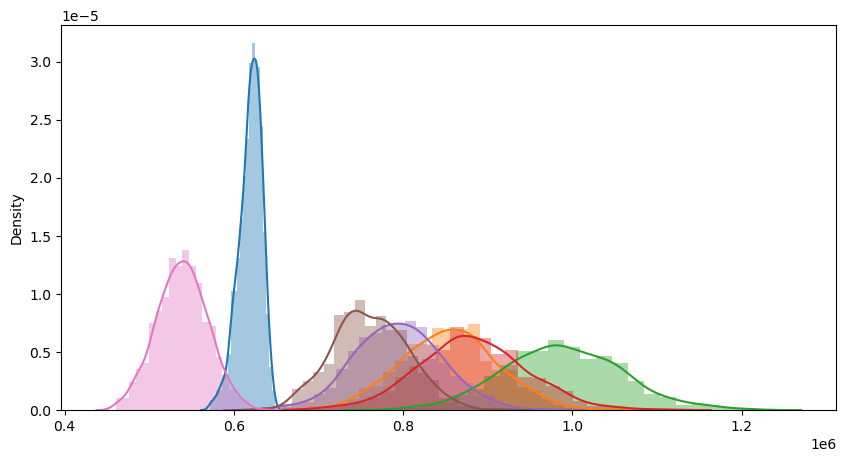

In [197]:
plt.figure(figsize=(10, 5))
for age_grp in age_groups:
    sns.distplot(age_grp_means[age_grp])

In [204]:
for age_grp in age_groups:
    print("Age Group",age_grp)
    age_df=pd.Series(age_grp_means[age_grp])
    print(np.round(age_df.mean(),2))

Age Group 0-17
619494.11
Age Group 18-25
854225.4
Age Group 26-35
988753.54
Age Group 36-45
881668.71
Age Group 46-50
794420.54
Age Group 51-55
761345.84
Age Group 55+
538980.21


For 95% Confidence Interval

In [198]:
for age_grp in age_groups:
    print("Age",age_grp)
    age_df=pd.Series(age_grp_means[age_grp])
    print("Lower limit:",age_df.mean()-1.96*age_df.std()/np.sqrt(len(age_df)))
    print("Upper limit:",age_df.mean()+1.96*age_df.std()/np.sqrt(len(age_df)))

Age 0-17
Lower limit: 618655.6552364036
Upper limit: 620332.5589535971
Age 18-25
Lower limit: 850735.4775039768
Upper limit: 857715.3208060248
Age 26-35
Lower limit: 984397.8194864256
Upper limit: 993109.2691935754
Age 36-45
Lower limit: 877668.3566214632
Upper limit: 885669.054258535
Age 46-50
Lower limit: 791218.861936602
Upper limit: 797622.2136533987
Age 51-55
Lower limit: 758600.5467106778
Upper limit: 764091.1259293222
Age 55+
Lower limit: 537130.2984930238
Upper limit: 540830.1310869768


#### Insights:
* Male population are spending more on Black Friday as compared to female population
* With 95% confidence, we can say the average spend of the male population lies between 925346.51 and 925936.36
* With 95% confidence, we can say the average spend of the female population lies between 711779.96 and 712404.80
* Unmarried Population are spending more as compared to married population
* With 95% confidence, we can say the average spend of the unmarried population lies between 880630.75 and 881037.76
* With 95% confidence, we can say the average spend of the married population lies between 842672.74 and 843405.56
* People belonging to Age 26-35 group are spending more as compared to other age groups.
* With 95% confidence, we can say that average spend of Age 26-35 group lies between 984397.81 and 993109.26
* Product Category 1,5 and 8 are being sold more as compared to other products.
* Occupation with codes 0,4 and 7 are spending more as compared to people with other occupation.
* Customers from City B are spending more as compare to customers from City A and C.
* More no of users are shopping from City C but the average spent amount is lesser for City C as compared to City B.


##### Recommendations:
* Walmart should try to retain male customers and should adopt marketing strategies to attract more female customers i.e. by introducing more female centric products or providing additional facilities to improve shopping experience for female customers.
* Single customers are spending more as compared to partnered customers, so company should understand the requirements of partnered customers and provide additional offers/discounts on products needed for partenered  customers.
* Age group 26-35 are spending more as compared to other age groups so Walmart should try to retain customers with age group 26-35.
* Age group 18-25 and 36-45 are also among the highest spending groups.Walmart should maintain the shopping experience for these groups to maintain sales and revenue.
* Age group 55+ are spending least no of money so Walmart should provide additional facilities to attract more old age people i.e providing special queues for senior citizens for faster billing or providing resting areas to provide more comfortable shopping experience.
* Product with categories 1,5 and 8 should be restocked frequently while products with category 9,14,17 and 20 are required in less demand so their stock can be maintained in lower quantity.
* Walmart should work on City C with highest no of customers and lower sales by providing lucrative offers/discounts so that average amount spent per transaction may increase, improving the overall sales of the stores.
